In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
# Carregando a base
df = pd.read_csv('demo01_tratada.csv')

In [3]:
# Dividindo em treinamento e validação
y = df[['mau']]
X = df.drop('mau', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [4]:
# 1. Defina um objeto com a função da árvore de decisão vista em aula.
clf = DecisionTreeClassifier(random_state=99)

In [5]:
# 2. Treine o modelo com os dados que você separou para treinamento.
clf = clf.fit(X_train,y_train)

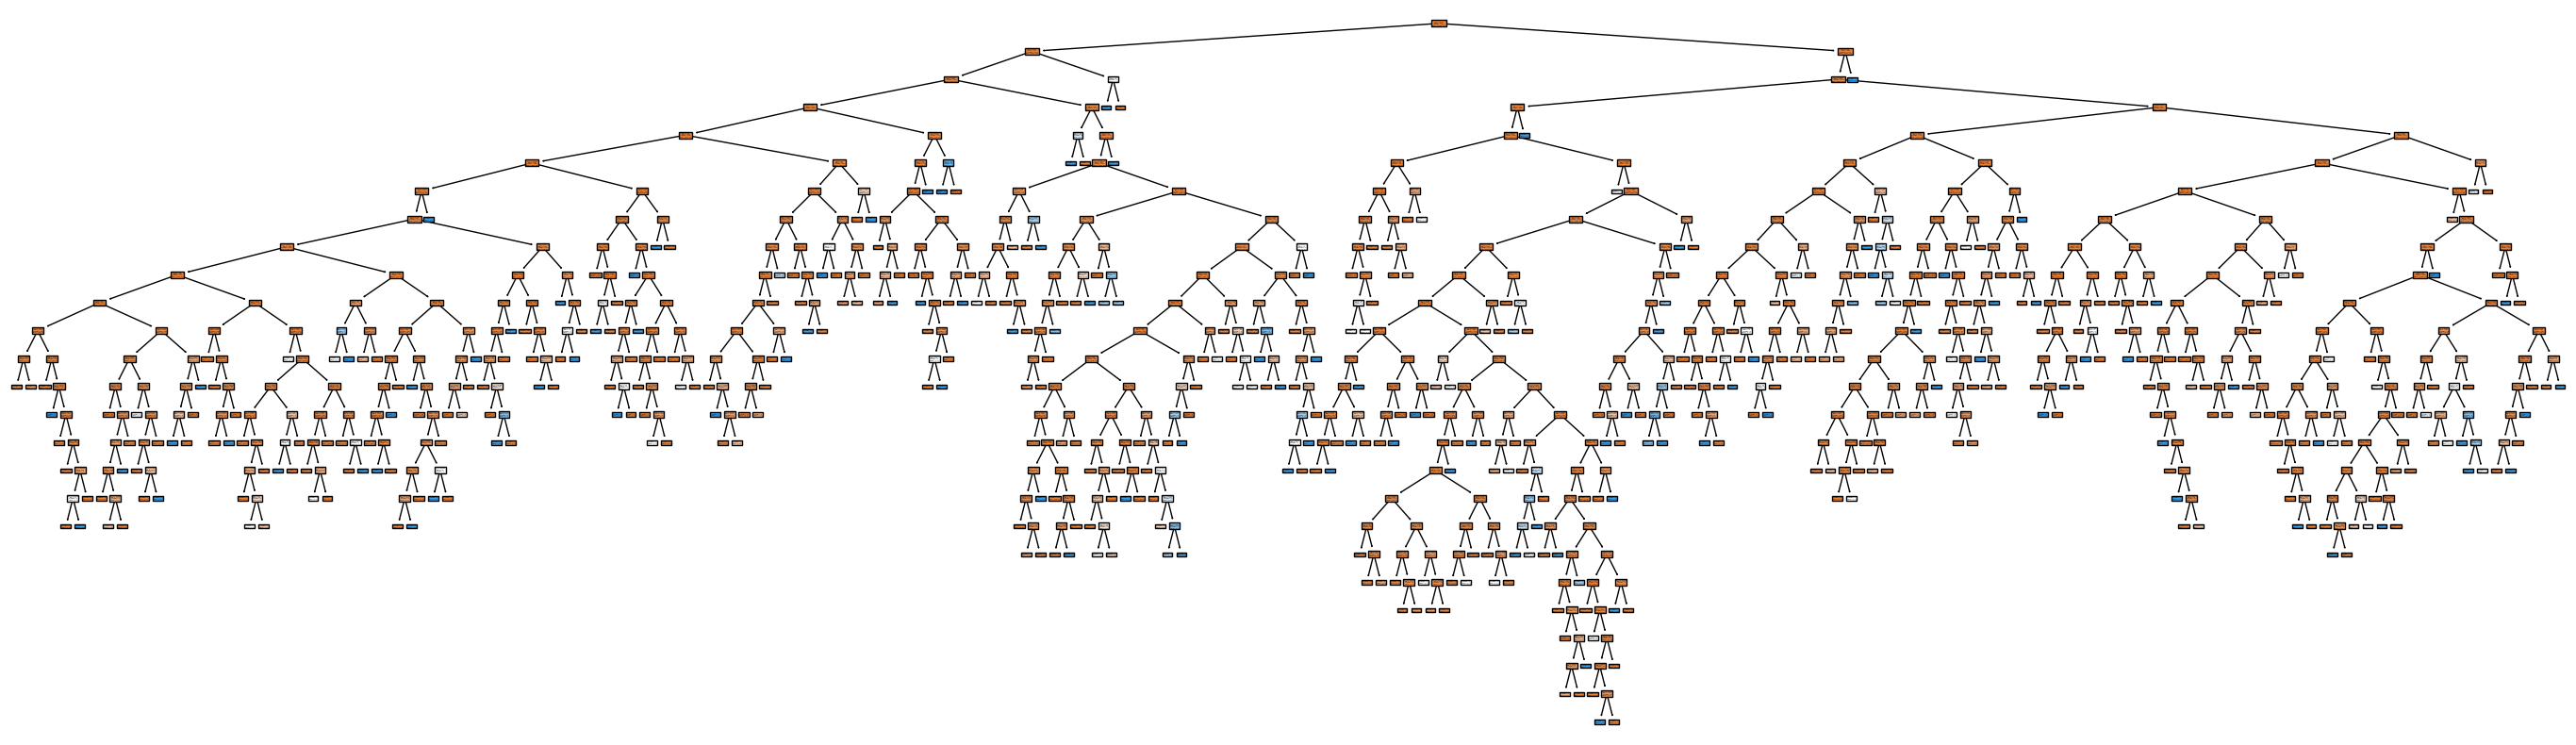

In [6]:
# 3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
plt.figure(figsize=[35,10])
plot_tree(clf,
          filled=True);

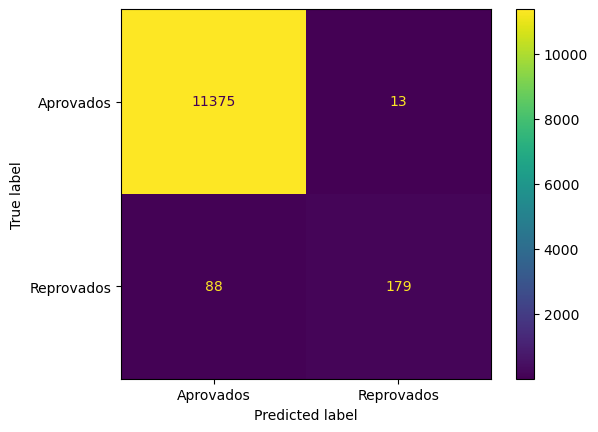

In [7]:
# 4. Produza uma visualização da matriz de classificação (ou matriz de confusão)
# Coloque os rótulos como "aprovados" e "reprovados", pois são essas as decisões que se podem tomar com propostas de crédito.
pred = clf.predict(X_train)
cm = confusion_matrix(y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados']) 
disp.plot()

In [8]:
# 5. Calcule a acurácia na base de treinamento
acc1 = accuracy_score(y_train, pred)
acc1

0.9913341913341913

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [9]:
# 1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
y_chapeu_teste = clf.predict(X_test)

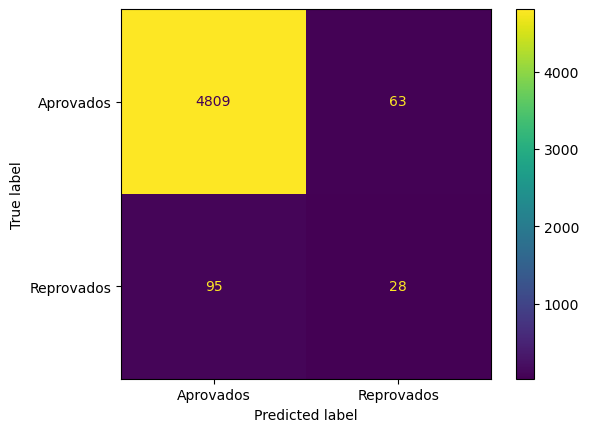

In [10]:
# 2. Produza a visualização da matriz de confusão para a base de teste.
cm = confusion_matrix(y_test, y_chapeu_teste)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados']) 
disp.plot() 

In [11]:
# 3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
acc2 = accuracy_score(y_test, y_chapeu_teste)
print(f'A acurácia da base de treinamento era {acc1}, enquanto da base de teste é {acc2}.')
print(f'a diferença é de {acc1-acc2}.')

A acurácia da base de treinamento era 0.9913341913341913, enquanto da base de teste é 0.9683683683683684.
a diferença é de 0.022965822965822946.


A proporção de poponentes classificados como maus foi de 0.56%.


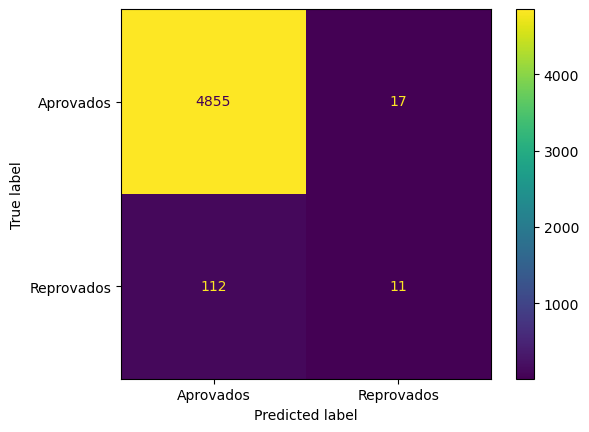

In [12]:
# 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123.
clf2 = DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)
clf2 = clf2.fit(X_train,y_train)

# Avalie a matriz de classificação. 
pred2 = clf2.predict(X_test)
cm = confusion_matrix(y_test, pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados']) 
disp.plot()


# Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
prop_maus = (cm[0,1]+cm[1,1])/cm.sum()
print("A proporção de poponentes classificados como maus foi de {:.2%}.".format(prop_maus))

### 5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

O cálculo da **acurácia** é <span style="color:blue">acertos</span>/(<span style="color:red">erros</span> + <span style="color:blue">acertos</span>).

Se eu classificasse todos como 'bons' ou 'aprovados' eu teria o número de <span style="color:blue">acertos</span> igual ao número de 'bons', ou seja, <span style="color:blue">acertos = 4855+17 = 4872</span>.

Porém meu número de <span style="color:red">erros</span> seria o valor de todos os maus, ou seja: <span style="color:red">erros = 112+11 = 123</span>.

A **acurácia** então seria: <span style="color:blue">4872</span>/(<span style="color:red">123</span>+<span style="color:blue">4872</span>)=**97,53%**